#**Homework 1 - Machine Learning**
#####*Filippo Betello 1835108*

##Import needed libraries

In [1]:
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt
from sklearn import svm, linear_model
from itertools import cycle, islice
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as pl
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

from google.colab import drive
from sklearn import tree

print('Libraries imported')

Libraries imported


##Load data


####**Mount Google Drive**

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


####**Load data**

In [ ]:
%ls '/content/drive/My Drive/ML Homework 1'

1835108.txt  blind_test.csv  mapping_traces.csv


In [3]:
filename = '/content/drive/My Drive/ML Homework 1/mapping_traces.csv'
db = pd.read_csv(filename, sep='\t')
db[["instructions","source_line","bug"]]

,instructions,source_line,bug
0,movl HIGHVAL l 19 1,int32t l 19 1 = ( -8 ) ;,0
1,movl HIGHVAL l 82 6,int32t l 25 73 = ( -1 ) ;,1
2,movq l 15 07 5 %rcx movq l 15 06 1 %rax movq M...,( * * l 15 06 1 ) = l 15 07 5 ;,0
3,movabsq HIGHVAL %rax cmpq %rax MEM je MEM mova...,( ( g 14 5 = = & l 15 8 ) ? ( void ) ( 0...,1
4,movw HIGHVAL l 41 89,int16t l 41 89 = ( -5 ) ;,0
...,...,...,...
99995,movsbl MEM %eax addq 48 %rsp popq %rbp retq,return g 88 ;,0
99996,movl HIGHVAL l 74 2,int32t l 74 2 = ( -1 ) ;,0
99997,movw MEM %ax movb %al MEM,"struct S 0 l 17 58 = { HIGHVAL , 6 , 14...",1
99998,leaq l 53 %rax movq %rax l 87,int32t * l 87 = & l 53 ;,0


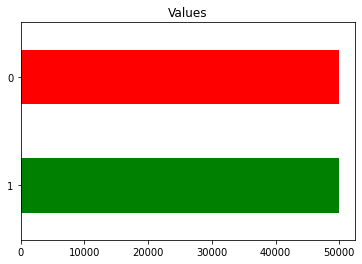

In [4]:
db["bug"].value_counts().plot(kind='barh', title='Values', color={'r','g'})

In data I put together the strings from instructions and source line

In [5]:
print("This are instructions: ", db.instructions[1])
print("This is the source line: ", db.source_line[1])
data = db.instructions + db.source_line
print("The combination is: ", data[1])

This are instructions:  movl HIGHVAL l 82 6 
This is the source line:  int32t  l  25 73  = ( -1 ) ;
The combination is:  movl HIGHVAL l 82 6 int32t  l  25 73  = ( -1 ) ;


##Method 1


####**Pre-processing**


Hashing vectorizer

In [6]:
start_time = time.time()
vectorizer = HashingVectorizer()
X_all = vectorizer.fit_transform(data)
y_all = db.bug
print("Hashing vectorization complete")
print("Time: %s s" % round(time.time() - start_time, 4))
print(X_all.shape)
print(y_all.shape)


Hashing vectorization complete
Time: 2.8022 s
(100000, 1048576)
(100000,)


####**Split** **data**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
          test_size=0.2, random_state=15)
print("Train: %d - Test: %d" %(X_train.shape[0],X_test.shape[0]))

Train: 80000 - Test: 20000


###Models


#####**Bernoulli NB model**

In [8]:
start_time = time.time()
model = BernoulliNB()
model.fit(X_train, y_train)
print('Bernoulli Model created')
print("Time: %s s" % round(time.time() - start_time, 4))

Bernoulli Model created
Time: 0.0889 s


#####**Logistic regression model**

In [ ]:
start_time = time.time()
model = linear_model.LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
print('Logistic regression Model created')
print("Time: %s s" % round(time.time() - start_time, 4))

Logistic regression Model created
Time: 50.1745 s


#####**K-Neighbors method**

It's important to find the best value of K with respect to the accuracy. There is the computation of the first fifty neighbors

In [ ]:
start_time = time.time()
acc_ = []
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    acc_.append(metrics.accuracy_score(y_test, y_pred))
print("Time: %s s" % round(time.time() - start_time, 4))

Time: 2975.837 s


Maximum accuracy:  0.7676 at K = 45


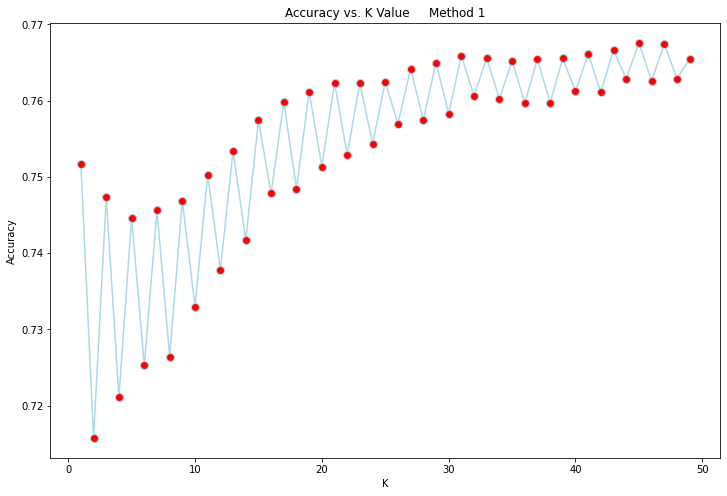

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1,50),acc_,color = 'lightblue',linestyle='solid', 
         marker='o',markerfacecolor='red', markersize=8)
plt.title('Accuracy vs. K Value     Method 1')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc_),"at K =",acc_.index(max(acc_))+1)

In [ ]:
start_time = time.time()
model = KNeighborsClassifier(n_neighbors=45)
model.fit(X_train, y_train)
print('K-Neighbors Classifier Model created')
print("Time: %s s" % round(time.time() - start_time, 4))

K-Neighbors Classifier Model created
Time: 0.0169 s


#####**Random Forest model**

In [ ]:
start_time = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
print('Random forest classifier created')
print("Time: %s s" % round(time.time() - start_time, 4))

Random forest classifier created
Time: 8889.0874 s


Random Forest with less number of estimators

In [ ]:
start_time = time.time()
model = RandomForestClassifier(n_estimators=64)
model.fit(X_train, y_train)
print('Random forest classifier created')
print("Time: %s s" % round(time.time() - start_time, 4))

Random forest classifier created
Time: 5969.7052 s


###**Prediction**

In [9]:
y_pred = model.predict(X_test)

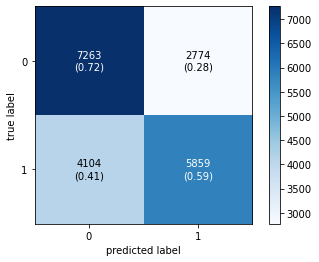

In [10]:
cm= confusion_matrix(y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True
                                )

In [11]:

print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.6390    0.7236    0.6787     10037
           1     0.6787    0.5881    0.6301      9963

    accuracy                         0.6561     20000
   macro avg     0.6588    0.6558    0.6544     20000
weighted avg     0.6587    0.6561    0.6545     20000



##Method 2

####**Pre-processing**
Tdif Vectorization

In [ ]:
start_time = time.time()
vectorizer = TfidfVectorizer()
X_all = vectorizer.fit_transform(data)
y_all = db.bug
print("Tfid vectorization complete")
print("Time: %s s" % round(time.time() - start_time, 4))
print(X_all.shape)
print(y_all.shape)

Tfid vectorization complete
Time: 2.8399 s
(100000, 1235)
(100000,)


####**Split** **data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
          test_size=0.2, random_state=15)
print("Train: %d - Test: %d" %(X_train.shape[0],X_test.shape[0]))

Train: 80000 - Test: 20000


###Models

#####**Bernoulli NB model**

In [ ]:
start_time = time.time()
model = BernoulliNB()
model.fit(X_train, y_train)
print('Bernoulli Model created')
print("Time: %s s" % round(time.time() - start_time, 4))

Bernoulli Model created
Time: 0.0426 s


#####**Logistic regression model**

In [ ]:
start_time = time.time()
model = linear_model.LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
print('Logistic regression Model created')
print("Time: %s s" % round(time.time() - start_time, 4))

Logistic regression Model created
Time: 2.6191 s


#####**K-Neighbors method**

It's important to find the best value of K with respect to the accuracy. There is the computation of the first fifty neighbors

In [ ]:
start_time = time.time()
acc = []
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))   
print("Time: %s s" % round(time.time() - start_time, 4))

Time: 3336.0852 s


Maximum accuracy: 0.7158 at K = 1


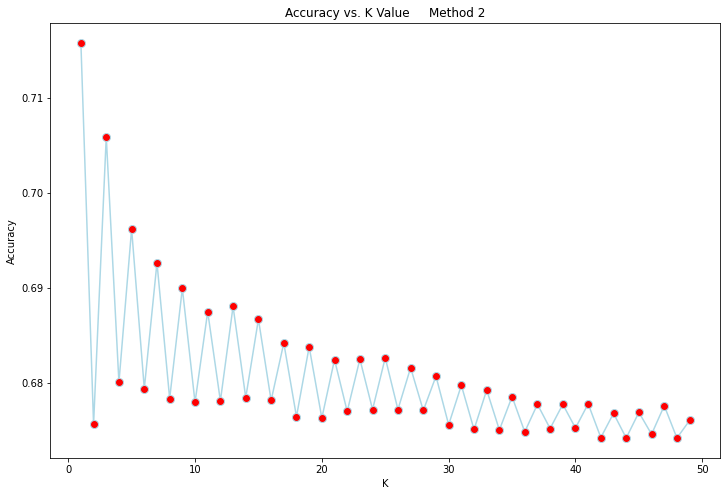

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1,50),acc,color = 'lightblue',linestyle='solid', 
         marker='o',markerfacecolor='red', markersize=8)
plt.title('Accuracy vs. K Value     Method 2')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc))+1)

In [ ]:
start_time = time.time()
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
print('K-Neighbors Classifier Model created')
print("Time: %s s" % round(time.time() - start_time, 4))

K-Neighbors Classifier Model created
Time: 0.0156 s


#####**Random Forest model**

In [ ]:
start_time = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
print('Random forest classifier created')
print("Time: %s s" % round(time.time() - start_time, 4))

Random forest classifier created
Time: 145.2686 s


###**Prediction**

In [ ]:
y_pred = model.predict(X_test)

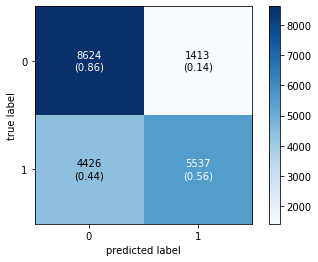

In [ ]:
cm= confusion_matrix(y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True
                                )

In [ ]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6608    0.8592    0.7471     10037
           1     0.7967    0.5558    0.6548      9963

    accuracy                         0.7080     20000
   macro avg     0.7288    0.7075    0.7009     20000
weighted avg     0.7285    0.7080    0.7011     20000



##Blind Test

Load the data of the blind test

In [ ]:
filename= filename = '/content/drive/My Drive/ML Homework 1/blind_test.csv'
blind = pd.read_csv(filename, sep='\t')
blind[["instructions","source_line"]]
print(len(blind))

10000


Using the mapping_traces data, train the Random Forest model (which is the best) with the Tdif vectorizer

In [ ]:
vectorizer = TfidfVectorizer()

X_all = vectorizer.fit_transform(data)
y_all = db.bug

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
          test_size=0.2, random_state=15)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9374    0.9720    0.9544     10037
           1     0.9707    0.9347    0.9523      9963

    accuracy                         0.9534     20000
   macro avg     0.9541    0.9533    0.9534     20000
weighted avg     0.9540    0.9534    0.9534     20000



Predict the label of the blind data and write this on a file called 1835108.txt

In [ ]:
blind_data = vectorizer.transform(blind.instructions+blind.source_line)
count1 = 0
count0 = 0
y_pred = model.predict(blind_data)
f = open('/content/drive/My Drive/ML Homework 1/1835108.txt', "w")
for pred in y_pred:
  if(pred==0): count0 = count0 + 1
  else: count1 = count1 + 1
  f.write(str(pred))
  f.write('\n')
f.close()
print("0: ", count0)
print("1: ", count1)

0:  5248
1:  4752


Check what is being written

In [ ]:
f = open("/content/drive/My Drive/ML Homework 1/1835108.txt", "r")
file = f.read()
f.close()
print(file)

1
0
0
0
0
1
1
1
1
1
1
1
1
0
1
0
0
0
0
1
0
1
1
1
0
0
0
0
0
0
0
0
0
1
1
0
1
0
1
0
0
0
1
1
0
0
0
0
0
0
1
0
0
1
0
0
1
1
0
0
0
1
0
1
0
1
1
1
1
1
1
0
1
0
1
1
0
0
1
0
1
0
1
0
1
0
0
1
1
1
1
0
1
1
0
0
1
0
0
1
0
0
0
0
0
1
0
1
0
0
1
1
1
0
0
1
0
1
1
1
1
0
0
1
1
0
1
0
1
0
1
1
0
1
0
0
1
0
1
0
1
1
0
0
0
1
1
0
1
1
0
0
0
0
0
0
0
1
0
0
1
0
1
1
0
0
0
1
1
0
1
0
1
0
0
0
0
1
0
1
1
0
1
0
1
1
1
0
1
0
1
1
1
0
1
0
0
1
1
0
1
1
1
1
1
0
0
1
1
0
0
0
1
0
0
1
1
0
0
1
1
0
1
1
1
1
0
1
0
1
0
1
0
1
1
0
0
0
1
0
0
0
0
0
1
1
0
1
1
0
0
0
1
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
1
1
0
1
0
0
0
1
1
1
1
0
0
0
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
0
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
1
0
0
0
1
0
0
1
1
1
0
1
1
0
0
0
1
1
1
1
0
0
1
1
1
0
1
1
1
1
1
0
1
0
1
1
1
1
1
0
1
0
1
0
0
0
0
0
1
1
0
1
0
0
1
1
0
0
1
0
0
0
0
1
1
0
0
1
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
1
0
1
0
0
1
1
0
0
0
0
0
1
0
1
0
1
0
1
0
0
0
1
0
0
1
0
1
0
1
0
1
0
1
1
0
0
1
1
0
0
0
0
1
0
1
0
1
0
0
1
1
1
0
1
1
1
0
1
0
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
0
0
1
0
1
0
1
0
1
1
1
0
1
0
1
1
1
0
0
0
